# Association Rules :
***Problem Statement :***
- Prepare association rule for given dataset. 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Loading the given dataset
movies_df = pd.read_csv("my_movies.csv")

# Showing given dataset
movies_df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
# Dimensions of dataset
movies_df.shape

(10, 15)

In [4]:
# Checking for null values present in given dataset
movies_df.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
# Summary of given dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
# Checking additional stats in given dataset
movies_df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

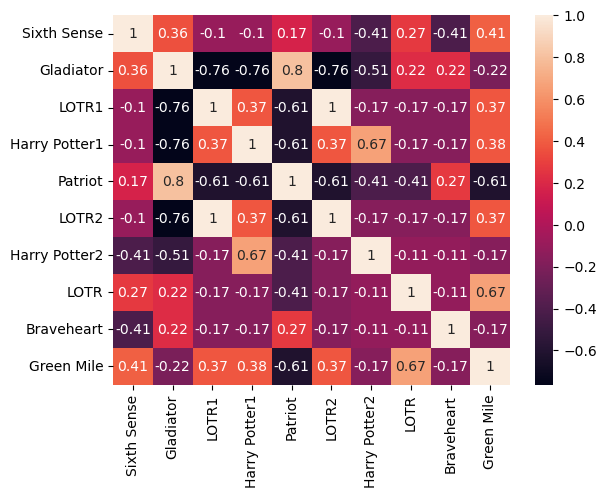

In [7]:
# Checking correlation between each numerical columns
sns.heatmap(movies_df.corr(),annot=True)

In [8]:
# Looking for duplicate values
movies_df[movies_df.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


***Encoding the dataset :***

In [9]:
# Converting categorical variables into dummy/indicator variables.
movies_df = pd.get_dummies(movies_df)
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# 1) Association Rule : 
- Lets try with support = 0.10 & confidence (min-threshold) = 0.7

In [10]:
# Apriori algorithm
apriori_1 = apriori(movies_df, min_support=0.10, use_colnames=True)
apriori_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1393,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1394,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1395,0.1,"(V2_LOTR1, V4_Green Mile, V3_Harry Potter1, LO..."


In [11]:
# Generating association rule
rule_1 = association_rules(apriori_1,metric='lift',min_threshold=0.7)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V1_Sixth Sense),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Green Mile),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [12]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rule_1[rule_1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V1_Sixth Sense),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Green Mile),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


<Figure size 1600x1200 with 0 Axes>

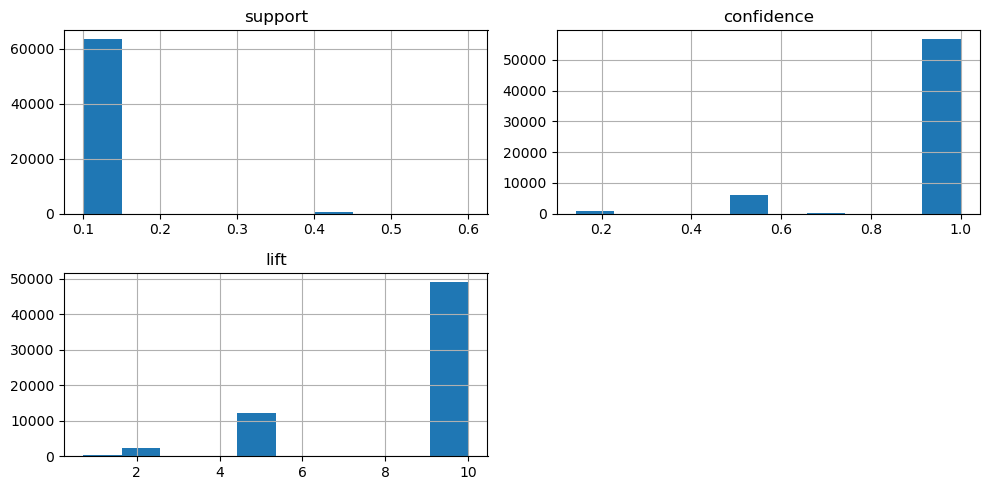

In [13]:
# Visualizing first association rule
plt.figure(dpi=250)

rule_1[['support','confidence','lift']].hist(figsize=(10,5))
plt.tight_layout()
plt.show()

# 2) Association Rule :
- Lets try with support = 0.05 & confidence (min_threshold) = 0.4

In [14]:
# Apriori algorithm
apriori_2 = apriori(movies_df,min_support=0.05,use_colnames=True)
apriori_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1393,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1394,0.1,"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr..."
1395,0.1,"(V2_LOTR1, V4_Green Mile, V3_Harry Potter1, LO..."


In [15]:
# Generating association rule
rule_2 = association_rules(apriori_2,min_threshold=0.4)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(V5_LOTR2),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63234,(V1_Sixth Sense),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63235,(Green Mile),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(Harry Potter1),"(V2_LOTR1, Sixth Sense, V4_Green Mile, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


<Figure size 1600x1200 with 0 Axes>

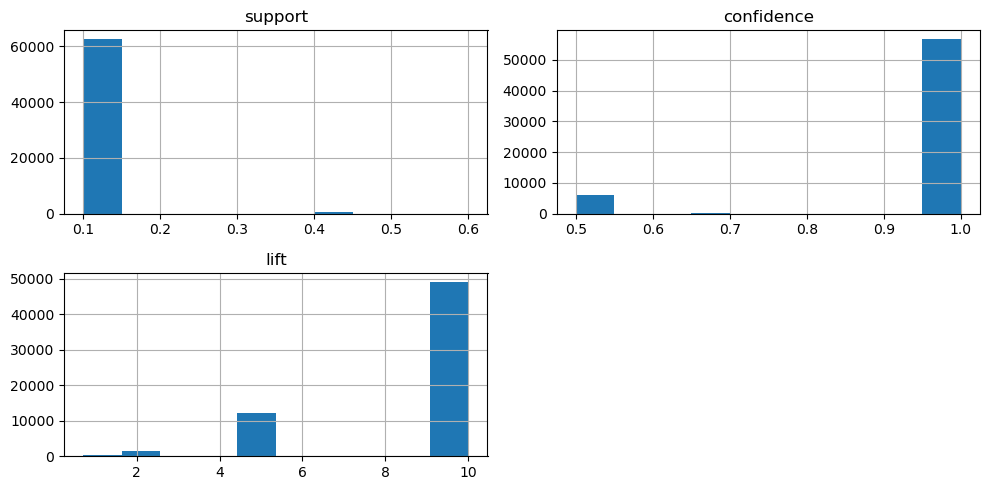

In [16]:
# Visualizing second association rule
plt.figure(dpi=250)

rule_2[['support','confidence','lift']].hist(figsize=(10,5))
plt.tight_layout()
plt.show()

# 3) Association Rule :
- Lets try with support = 0.2 & confidence (min_threshold) = 0.2

In [17]:
# Apriori algorithm
apriori_3 = apriori(movies_df,min_support=0.2,use_colnames=True)
apriori_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Sixth Sense, Gladiator, V3_Sixth Sense, Patri..."
77,0.4,"(Sixth Sense, V1_Gladiator, Gladiator, V3_Sixt..."
78,0.4,"(Sixth Sense, V1_Gladiator, V3_Sixth Sense, Pa..."
79,0.4,"(V1_Gladiator, Gladiator, V3_Sixth Sense, Patr..."


In [18]:
# Generating association rule
rule_3 = association_rules(apriori_3,min_threshold=0.2)
rule_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V1_Gladiator),"(Sixth Sense, Gladiator, V3_Sixth Sense, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Gladiator),"(Sixth Sense, V1_Gladiator, V3_Sixth Sense, Pa...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
651,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, Gladiator, Patriot...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
652,(Patriot),"(Sixth Sense, V1_Gladiator, Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


<Figure size 1600x1200 with 0 Axes>

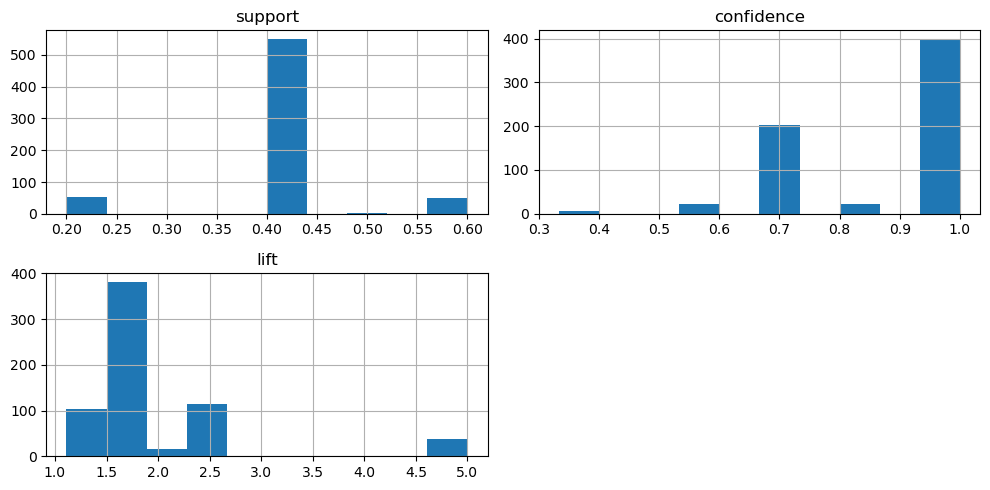

In [19]:
# Visualizing third association rule
plt.figure(dpi=250)

rule_3[['support','confidence','lift']].hist(figsize=(10,5))
plt.tight_layout()
plt.show()